In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns


In [4]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#top 10 skills by median salary
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

#top 10 skills by count
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

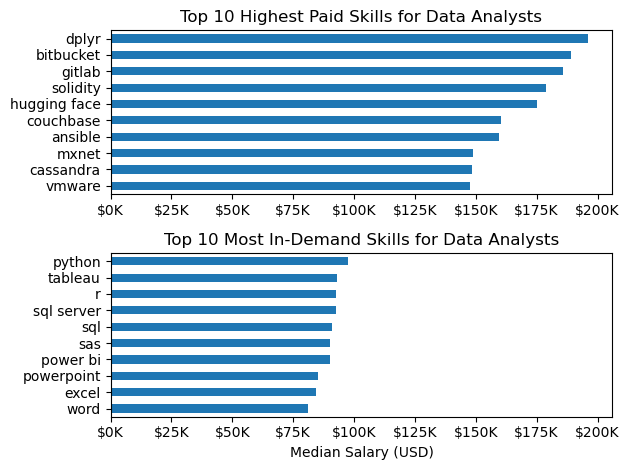

In [7]:
#plotting both new dataframes above:
fig, ax = plt.subplots(2, 1) #2 rows and 1 column

df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
#ax[0].invert_yaxis() #alternative method to sorting
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

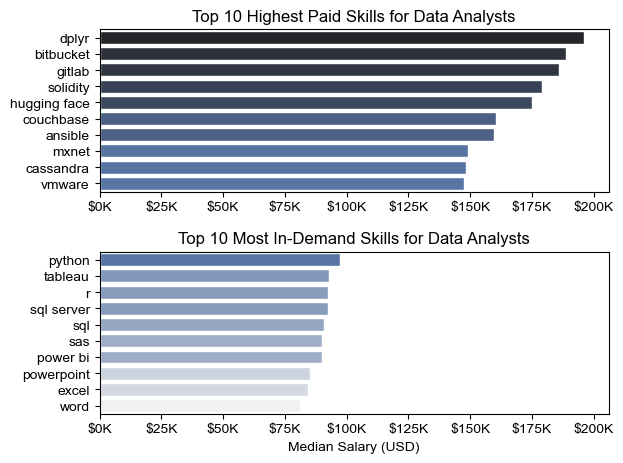

In [13]:
#plotting both new dataframes above:
fig, ax = plt.subplots(2, 1) #2 rows and 1 column

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
#ax[0].invert_yaxis() #alternative method to sorting
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

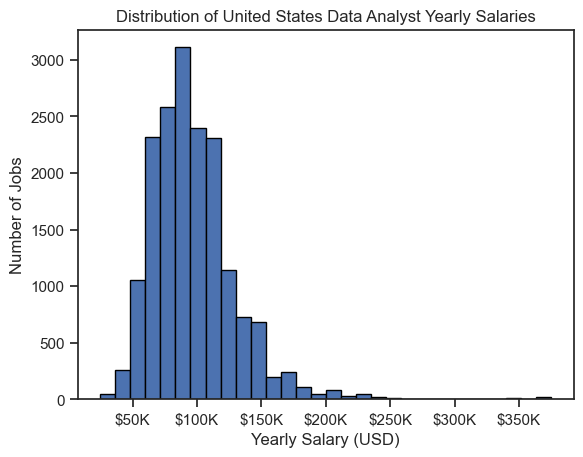

In [14]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

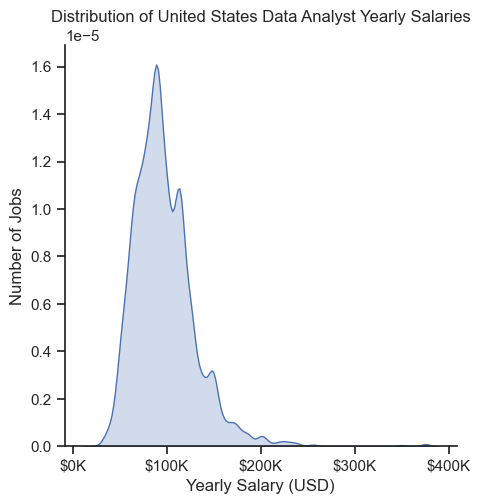

In [16]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
#df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

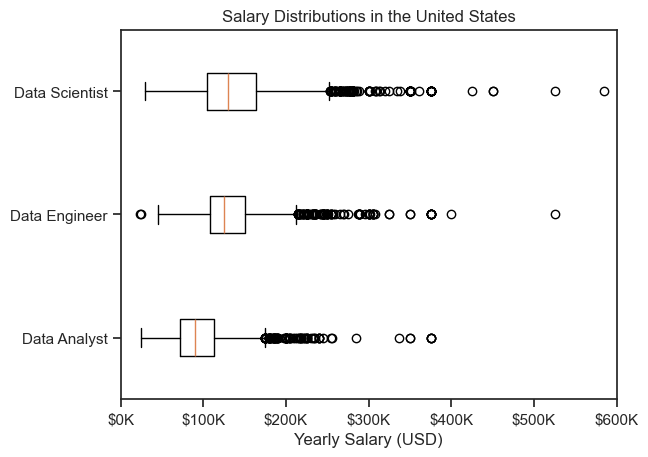

In [20]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

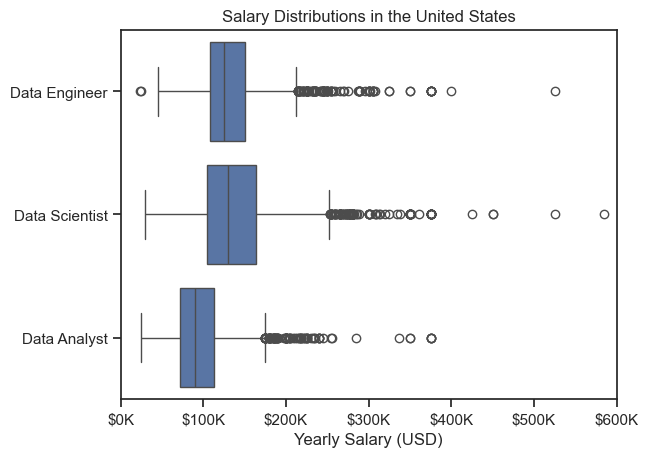

In [22]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
#plt.boxplot(job_list, tick_labels=job_titles, vert=False)

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

🟩 Top Companies Bar Plot (2.20.1) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:
Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

In [60]:
# Only get data analyst jobs in the US and dropna
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()



In [57]:
df_DS_US = df_DS_US.groupby('company_name')['salary_year_avg'].agg(['median']).sort_values(by='median', ascending=False)
df_DS_US = df_DS_US.head(5)
df_DS_US

,median
company_name,
ReServe,585000.0
"East River Electric Power Cooperative, Inc.",537000.0
Lands End,375000.0
"Analog Devices, Inc",375000.0
Blue Cross and Blue Shield of Minnesota,375000.0


C:\Users\rikki\AppData\Local\Temp\ipykernel_11620\3268796309.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


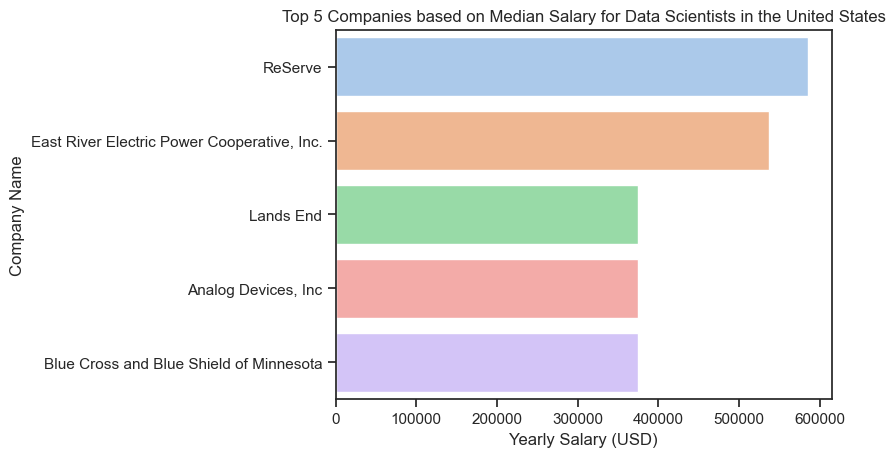

In [58]:
#fig, ax = subplots(1,1)

sns.barplot(data=df_DS_US, x='median', y=df_DS_US.index, hue=df_DS_US.index, palette='pastel')

plt.title('Top 5 Companies based on Median Salary for Data Scientists in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.legend().remove()

plt.show()

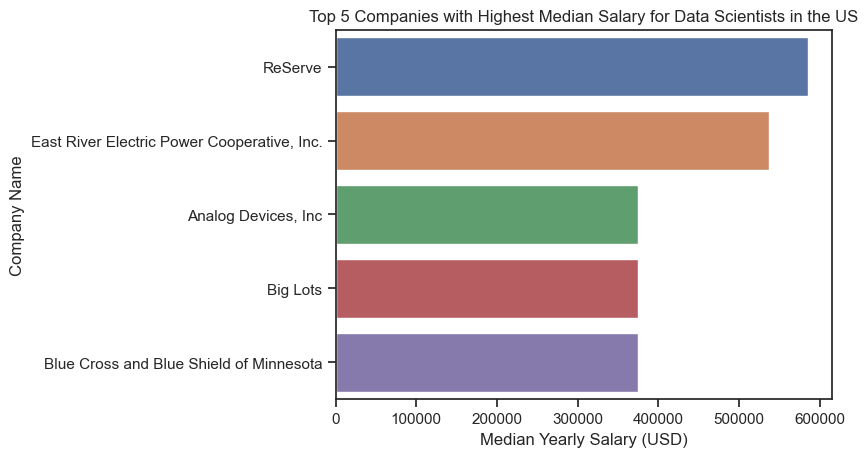

In [65]:
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue='company_name')
#sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

🟨 Data Scientist Salary Histogram (2.20.2) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:
Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
Use 25 bins for the histogram and set the x-axis limit to 700,000.
Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

In [66]:
# Only get data analyst jobs in the US and dropna
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

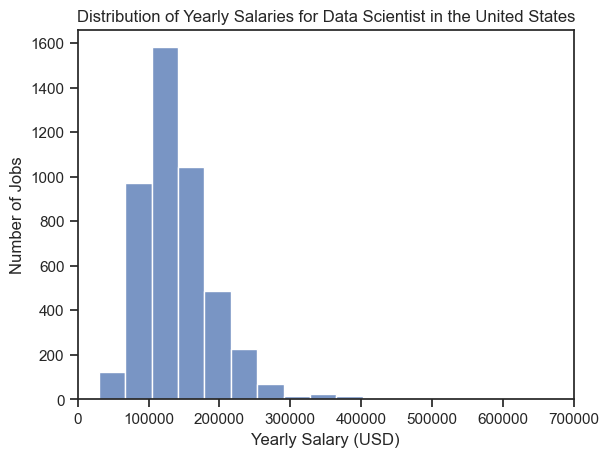

In [75]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25, kde=False)

plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

ax = plt.gca()
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0, 700000)

plt.show()

🟨 Data Roles Salary Box Plot (2.20.3) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:
Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
Set the x-axis limit to 300,000 and format it as $100k.
Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.
Code Needed:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [76]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filter on job_titles and job_country (India):
df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

#list of salaries for each job_title:
job_list = [df_IN[df_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

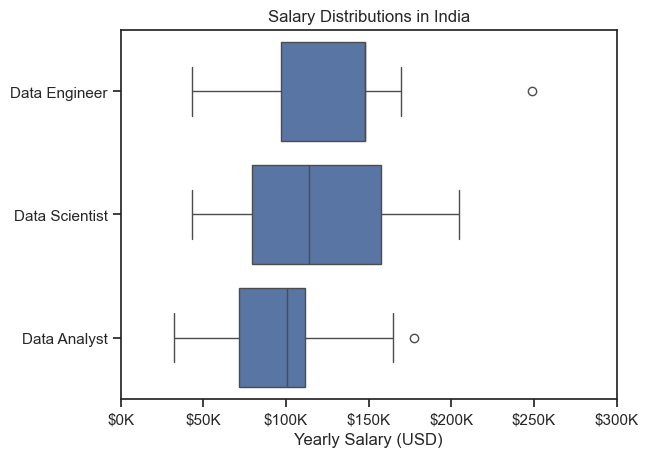

In [78]:
sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

🟨 Salary Distribution for United States (2.20.4) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:
Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

In [79]:
# Only get data scientist jobs in the US and dropna
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

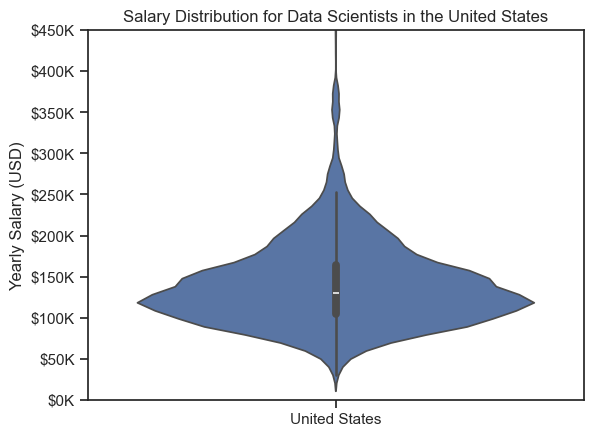

In [84]:
sns.violinplot(data=df_DS_US, x='job_country', y='salary_year_avg')

plt.title('Salary Distribution for Data Scientists in the United States')
plt.ylabel('Yearly Salary (USD)')
plt.xlabel('')

plt.ylim(0, 450000)
ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_y)

plt.show()
